In [57]:
import os
import sys

# os.chdir('../')
sys.path.append(os.getcwd())


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.decomposition import PCA
from scipy.stats import fisher_exact, chi2_contingency
from sklearn.manifold import TSNE, MDS
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, PrecisionRecallDisplay
from multipy.fwer import sidak, hochberg
import random
import logomaker

from utils.viz_utils import plot_usage_matrix_pca, plot_boxplots_for_usage_matrix, _plot_feature_importance, plot_v_usage_hist, \
                                plot_cluster_map, significant_clones_distribution, plot_results_for_hla_class, plot_generated_to_real_distribution, \
                            plot_olga_cleanup_data, plot_clusters_of_clonotypes, plot_cooccurence_heatmap_with_epitopes_labeling, plot_waterfall_by_column, \
                            plot_feature_importances, plot_clonotype_clustering_with_epitope_labeling
from utils.ml_utils import get_parameters, prepare_data, evaluate_models, split_data_by_batch, split_data, cross_validation_between_batches, make_hla_predictor
from utils.data_utils import prepare_run_column
from utils.stats_utils import evaluate_anova_testing, evaluate_mannwhitneyu_testing
from utils.clustering_utils import seqs2hamming, check_significant_epitopes_for_cluster, get_most_frequent_cluster_by_vdjdb_occurence, \
                                    create_summary_stats_table, check_significant_epitopes_for_all_clusters, read_association_data
from utils.weblogo_utils import create_web_logo

from source.tests_analysis.significant_clonotype_matrix_creation import create_significant_clonotype_matrix

import warnings
warnings.filterwarnings('ignore')


import importlib
imported_module = importlib.import_module("utils.viz_utils")
importlib.reload(imported_module)

<module 'utils.viz_utils' from '/home/evlasova/tcr-covid-classifier/utils/viz_utils.py'>

In [2]:
pvals = pd.read_csv('data/covid_significant_clone_pvals_fmba_TRB_random_521.csv')
pvals = pvals[pvals.pval < 0.0001]
pvals

,Unnamed: 0,clone,pval
3980,3980,CAGSQGGYEQYF,0.000014
8506,8506,CAIRTSYEQYF,0.000021
22442,22442,CAITQGNTEAFF,0.000022
25945,25945,CASAGSSYEQYF,0.000017
29613,29613,CASDRVSNQPQHF,0.000082
...,...,...,...
1307882,1307882,CSASRGGQPQHF,0.000049
1313060,1313060,CSATDREYEQYF,0.000082
1317954,1317954,CSATVGDTEAFF,0.000041
1333723,1333723,CSVGGGYEQYF,0.000031


In [3]:
pvals[['clone']].to_csv('data/covid_significant_clones_fmba_TRB_random_521.csv', index=False)

In [4]:
create_significant_clonotype_matrix(clonotype_matrix_path='data/clone_matrix_fmba_TRB_top_500k.csv', 
                                    significant_clones_path='data/covid_significant_clones_fmba_TRB_random_521.csv', 
                                    save_path='data/significant_clone_matrix_fisher_fmba_TRB_random_521.csv')

In [5]:
pd.read_csv('data/significant_clone_matrix_fisher_fmba_TRB_A02.csv')

,Unnamed: 0,CASSLGGSYEQYF,CASSLGQGYEQYF,CASSQGYEQYF,CASSLGSSYEQYF,CASSLAGSYEQYF,CASSPGYEQYF,CASSLGQSYEQYF,CASSPGTGSYEQYF,CASSLGTGGYEQYF,...,CASSIQGTNQPQHF,CSVEDNGYTF,CASSIEGSTYNEQFF,CASSVVSGAQETQYF,CASSPARRYGYTF,CASSIDWNTGELFF,CASIRGGSSYNEQFF,CASKGTVTNEKLFF,CASSQDRPAGYTF,run
0,0,1,2,0,1,2,0,1,1,2,...,0,0,0,0,0,0,0,0,0,500003930808_S33_L001.clonotypes.TRB.txt
1,1,4,6,4,1,0,5,2,3,2,...,0,0,0,0,0,0,0,0,0,250002590808_S99_L002.clonotypes.TRB.txt
2,2,6,2,5,5,8,7,3,2,4,...,0,0,0,0,0,0,0,0,0,050002290808_S117_L002.clonotypes.TRB.txt
3,3,9,2,4,9,5,4,9,2,5,...,0,0,0,0,0,0,0,0,0,460000170808_S6_L001.clonotypes.TRB.txt
4,4,0,3,2,2,0,3,2,1,2,...,0,0,0,0,0,0,0,0,0,590002490808_S80_L001.clonotypes.TRB.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,1220,0,1,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,p17_77-1_DNA_S4_L001.clonotypes.TRB.txt
1221,1221,13,12,10,10,9,9,6,10,12,...,0,0,0,0,0,0,0,0,0,p17_2_DNA_S18_L001.clonotypes.TRB.txt
1222,1222,5,4,8,4,10,10,1,9,9,...,0,0,0,0,0,0,0,0,1,p17_55-2_DNA_S13_L001.clonotypes.TRB.txt
1223,1223,9,6,3,4,5,6,6,5,5,...,0,1,0,0,0,1,0,0,0,p17_62_DNA_S74_L001.clonotypes.TRB.txt


In [6]:
# pvals = pd.read_csv('data/hla_covid_associated_clones_TRB/hla_covid_associated_clones_1_mismatch_hla_A*02_pvals.csv')
# pvals = pvals[pvals.pval < 0.0001]
# pvals

In [7]:
# pvals[['clone']].to_csv('data/covid_significant_clones_fmba_TRB_A02.csv', index=False)
# create_significant_clonotype_matrix(clonotype_matrix_path='data/clone_matrix_fmba_TRB_top_500k.csv', 
#                                     significant_clones_path='data/covid_significant_clones_fmba_TRB_A02.csv', 
#                                     save_path='data/significant_clone_matrix_fisher_fmba_TRB_A02.csv')

In [8]:
random.seed(42)
selected_runs_beta = random.sample(set(prepare_run_column(pd.read_csv('data/run_to_number_of_clones_fmba_TRB.csv')).run), 521)
selected_runs_alpha = random.sample(set(prepare_run_column(pd.read_csv('data/run_to_number_of_clones_fmba_TRA.csv')).run), 545)

In [9]:
data_random_TRB = prepare_data(run_to_number_of_clones_path='data/run_to_number_of_clones_fmba_TRB.csv',
                     desc_path='data/standardized_usage_matrix_fmba_TRA_v.csv',
                     clonotype_matrix_path='data/significant_clone_matrix_fisher_fmba_TRB_random_521.csv',
                     hla_keys_path='data/hla_keys.csv',
                     make_freq=True, 
                     use_hla_clones=False, 
                     use_hla_bool=True, 
                     make_all_features_bool=False, 
                     use_standardization=True,
                     raw_target_column='covid',
                     raw_target_clumn_success_label='covid',
                     selected_runs=selected_runs_beta)

In [10]:
data_random_TRA = prepare_data(run_to_number_of_clones_path='data/run_to_number_of_clones_fmba_TRA.csv',
                     desc_path='data/standardized_usage_matrix_fmba_TRA_v.csv',
                     clonotype_matrix_path='data/significant_clone_matrix_fisher_fmba_TRA_random_545.csv',
                     hla_keys_path='data/hla_keys.csv',
                     make_freq=True, 
                     use_hla_clones=False, 
                     use_hla_bool=True, 
                     make_all_features_bool=False, 
                     use_standardization=True,
                     raw_target_column='covid',
                     raw_target_clumn_success_label='covid',
                     selected_runs=selected_runs_alpha)

In [11]:
X_train_rb, y_train_rb, X_test_rb, y_test_rb = split_data(data=data_random_TRB, y_column='covid', by='is_test_run')
best_clfs_rb = evaluate_models(X_train_rb, y_train_rb, X_test_rb, y_test_rb, 
                              get_parameters(), scoring_function='f1_weighted', debug=False)

classifier       svm        ab       knn   rfc  mlpclassifier  xgboost
f1-score    0.753623  0.818182  0.745763  0.75       0.794118     0.72
Best model is ab with params: {'model__base_estimator': DecisionTreeClassifier(max_depth=1), 'model__n_estimators': 200, 'model__random_state': 42}


In [12]:
X_train_ra, y_train_ra, X_test_ra, y_test_ra = split_data(data=data_random_TRA, y_column='covid', by='is_test_run')
best_clfs_ra = evaluate_models(X_train_ra, y_train_ra, X_test_ra, y_test_ra, 
                              get_parameters(), scoring_function='f1_weighted', debug=False)

classifier       svm        ab       knn       rfc  mlpclassifier   xgboost
f1-score    0.666667  0.684932  0.645161  0.666667       0.637681  0.675676
Best model is ab with params: {'model__base_estimator': DecisionTreeClassifier(max_depth=3), 'model__n_estimators': 200, 'model__random_state': 42}


In [13]:
a02_runs = prepare_run_column(pd.read_csv('data/hla_desc/fmba_desc_hla_A*02.csv')).run

In [14]:
data_ab = prepare_data(run_to_number_of_clones_path='data/run_to_number_of_clones_fmba_TRB.csv',
                     desc_path='data/standardized_usage_matrix_fmba_TRA_v.csv',
                     clonotype_matrix_path='data/significant_clone_matrix_fisher_fmba_TRB_A02.csv',
                     hla_keys_path='data/hla_keys.csv',
                     make_freq=True, 
                     use_hla_clones=False, 
                     use_hla_bool=True, 
                     make_all_features_bool=False, 
                     use_standardization=True,
                     raw_target_column='covid',
                     raw_target_clumn_success_label='covid',
                     selected_runs=a02_runs)

In [15]:
pvals = pd.read_csv('data/hla_covid_associated_clones_TRA/hla_covid_associated_clones_1_mismatch_hla_A*02_pvals.csv')
pvals = pvals[pvals.pval < 0.00001]
pvals

,Unnamed: 0,clone,pval
0,0,CAVKDSNYQLIW,1.559910e-34
1,1,CAVMDSSYKLIF,1.519232e-08
3,3,CAVNQAGTALIF,1.189614e-07
4,4,CAVNTGGFKTIF,1.078248e-09
5,5,CAVVDSNYQLIW,1.223685e-36
...,...,...,...
497090,497090,CAVNINKFYF,2.613059e-06
497133,497133,CAVGVDNFNKFYF,4.637167e-06
497535,497535,CAVNIDNFNKFYF,1.383327e-10
497629,497629,CAGGINFNKFYF,7.883930e-06


In [16]:
pvals[['clone']].to_csv('data/covid_significant_clones_fmba_TRA_A02.csv', index=False)
create_significant_clonotype_matrix(clonotype_matrix_path='data/clone_matrix_fmba_TRA_top_500k.csv', 
                                    significant_clones_path='data/covid_significant_clones_fmba_TRA_A02.csv', 
                                    save_path='data/significant_clone_matrix_fisher_fmba_TRA_A02.csv')

In [17]:
data_aa = prepare_data(run_to_number_of_clones_path='data/run_to_number_of_clones_fmba_TRA.csv',
                     desc_path='data/standardized_usage_matrix_fmba_TRA_v.csv',
                     clonotype_matrix_path='data/significant_clone_matrix_fisher_fmba_TRA_A02.csv',
                     hla_keys_path='data/hla_keys.csv',
                     make_freq=True, 
                     use_hla_clones=False, 
                     use_hla_bool=False, 
                     make_all_features_bool=False, 
                     use_standardization=True,
                     raw_target_column='covid',
                     raw_target_clumn_success_label='covid',
                     selected_runs=a02_runs)

In [18]:
X_train_ab, y_train_ab, X_test_ab, y_test_ab = split_data(data=data_ab, y_column='covid', by='is_test_run')
best_clfs_ab = evaluate_models(X_train_ab, y_train_ab, X_test_ab, y_test_ab, 
                              get_parameters(), scoring_function='f1_weighted', debug=False)

classifier       svm   ab       knn       rfc  mlpclassifier   xgboost
f1-score    0.897959  0.8  0.730159  0.638889       0.913043  0.677966
Best model is mlpclassifier with params: {'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100, 60, 30, 10), 'model__learning_rate': 'constant', 'model__max_iter': 1000, 'model__random_state': 42}


In [19]:
X_train_aa, y_train_aa, X_test_aa, y_test_aa = split_data(data=data_aa, y_column='covid', by='is_test_run')
best_clfs_aa = evaluate_models(X_train_aa, y_train_aa, X_test_aa, y_test_aa, 
                              get_parameters(), scoring_function='f1_weighted', debug=False)

classifier       svm        ab       knn       rfc  mlpclassifier   xgboost
f1-score    0.888889  0.734694  0.666667  0.647887       0.816327  0.653846
Best model is svm with params: {'model__C': 1, 'model__kernel': 'linear', 'model__probability': True, 'model__random_state': 42}


In [20]:
vdjdb = pd.read_csv('data/vdjdb.txt', sep='\t')

In [21]:
ab_beta_clones = X_train_ab.columns[:-1]

In [22]:
aa_alpha_clones = X_train_aa.columns[:-1]

In [27]:
res_beta = seqs2hamming(ab_beta_clones, viz_method='graphopt')
beta_cluster_to_epi = read_association_data('figures/associations/fmba_a02_TRB_sign_assoc_with_max_enrichment.csv')

LLYDANYFL


Text(0.5, 1.0, 'TCRβ A*02 biomarkers clustering, 197 clusters')

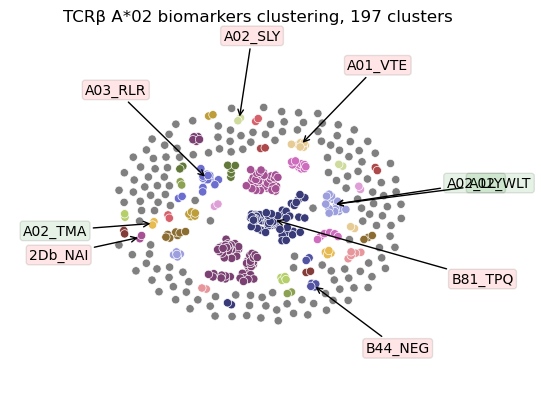

In [28]:
plot_clonotype_clustering_with_epitope_labeling(res_beta, beta_cluster_to_epi, vdjdb, gene='TRB', dist_to_center=950, global_zero_based=True)
plt.xlim(-1100, 1100)
plt.ylim(-1100, 1100)
plt.axis('off')
plt.legend().remove()
plt.title(f'TCRβ A*02 biomarkers clustering, {res_beta.cluster.max() + 1} clusters')

In [33]:
res_alpha = seqs2hamming(aa_alpha_clones, viz_method='drl')

In [34]:
res_alpha

,cdr3,cluster,x,y,cluster_size,x_mean,y_mean
0,CAVKDSNYQLIW,0,200.620010,-24.707891,215,157.814575,-82.340045
1,CAVVDSNYQLIW,0,182.853836,-91.010567,215,157.814575,-82.340045
2,CAVSDSNYQLIW,0,201.022858,-27.089205,215,157.814575,-82.340045
3,CAVTDSNYQLIW,0,200.610168,-21.643213,215,157.814575,-82.340045
4,CAVEDSNYQLIW,0,201.457672,-30.980066,215,157.814575,-82.340045
...,...,...,...,...,...,...,...
3222,CAGQLYGGSQGNLLF,169,-118.694061,526.140198,1,-118.694061,526.140198
3223,CAGRVGYKLSF,170,-248.151810,306.155670,1,-248.151810,306.155670
3224,CAVRDLYSGNTPLVL,171,-287.908020,299.953735,1,-287.908020,299.953735
3225,CIVKPTGTASKLTF,172,89.266876,-406.213318,1,89.266876,-406.213318


In [31]:
alpha_cluster_to_epi = read_association_data('figures/associations/fmba_a02_TRA_sign_assoc_with_max_enrichment.csv')

LACFVLAAV
TMADLVYAL
SIIAYTMSL
VGGNYNYLYRLFRKS
LIIMRTFKV
RVVVLSFEL
FPLCANGQV
TLIVNSVLL
FLEGETLPT
STDVTIATY
KVYPIILRL
NPTIQKNVL
NTFSSTFNV
VYFLQSINF
MPASWVMRI
YMPYFFTLL
FMCVEYCPI
KLQFTSLEI
RIRGGDGKM
YLYALVYFL
LMCQPILLL
TLKNTVCTV
YLGGMSYYC
MLDMYSVML
QELIRQGTDY
RISNCVADYSVLYNS
KLNEEIAII
VTDNTFTLK
KLVNKFLAL
TTDPSFLGRY
VFLVLWPLV
MEVTPSGTWL
SMMILSDDA
NCTFEYVSQPFLMDL
NCTFEYVSQPFLMDL
NCTFEYVSQPFLMDL


Text(0.5, 1.0, 'TCRα A*02 biomarkers clustering, 174 clusters')

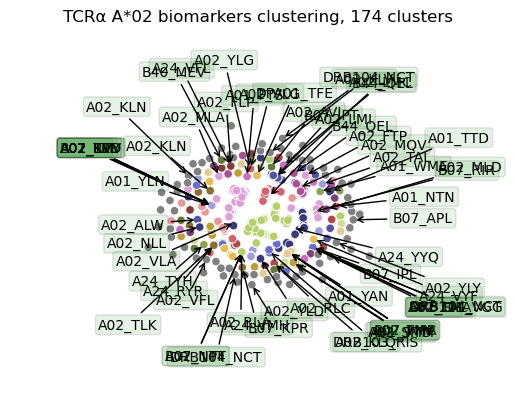

In [61]:
plot_clonotype_clustering_with_epitope_labeling(res_alpha, alpha_cluster_to_epi, vdjdb, gene='TRA', dist_to_center=600, global_zero_based=True, species_to_plot=['SARS-CoV-2'])
plt.xlim(-1100, 1100)
plt.ylim(-1100, 1100)
plt.axis('off')
plt.legend().remove()
plt.title(f'TCRα A*02 biomarkers clustering, {res_alpha.cluster.max() + 1} clusters')

In [62]:
all_clfs = {
     'random_beta': best_clfs_rb,
     'a02_beta': best_clfs_ab,
     'random_alpha': best_clfs_ra,
     'a02_alpha': best_clfs_aa,
}
X_test_data={
     'random_beta': X_test_rb,
     'a02_beta': X_test_ab,
     'random_alpha': X_test_ra,
     'a02_alpha': X_test_aa,
}
y_test_data={
     'random_beta': y_test_rb,
     'a02_beta': y_test_ab,
     'random_alpha': y_test_ra,
     'a02_alpha': y_test_aa,
}
X_train_data={
     'random_beta': X_train_rb,
     'a02_beta': X_train_ab,
     'random_alpha': X_train_ra,
     'a02_alpha': X_train_aa,
}
y_train_data={
     'random_beta': y_train_rb,
     'a02_beta': y_train_ab,
     'random_alpha': y_train_ra,
     'a02_alpha': y_train_aa,
}

In [63]:
model_df = []
f1_df = []
data_type_df = []
for data_type in ['random_beta','a02_beta', 'random_alpha', 'a02_alpha']:
    for model in ['svm', 'ab', 'knn', 'rfc', 'mlpclassifier', 'xgboost']:
        cur_score = f1_score(y_test_data[data_type], all_clfs[data_type][0][model].predict(X_test_data[data_type]))
        model_df.append(model)
        data_type_df.append(data_type)
        f1_df.append(cur_score)
comparison_df = pd.DataFrame({'model':model_df, 'f1': f1_df, 'data_type':data_type_df})

<AxesSubplot:xlabel='data_type', ylabel='f1'>

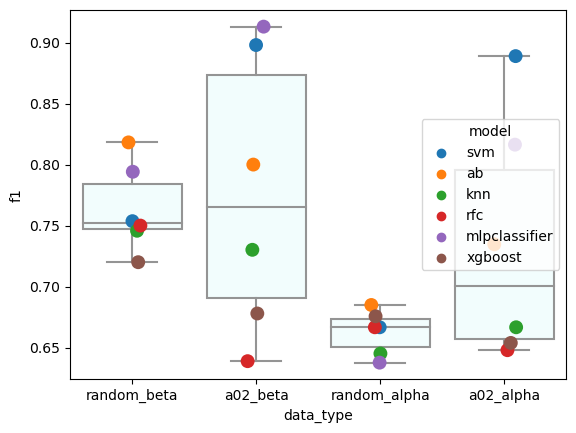

In [64]:
sns.stripplot(data=comparison_df, x="data_type", y="f1", hue="model", s=10)
sns.boxplot(data=comparison_df, x="data_type", y="f1", color='azure')

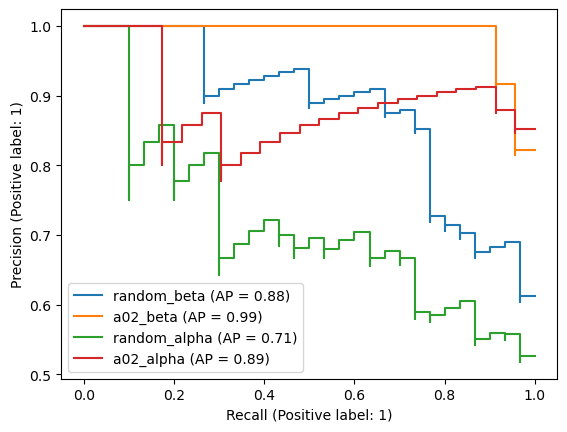

In [65]:
fig, ax = plt.subplots()
for key in all_clfs:
    PrecisionRecallDisplay.from_estimator(
        all_clfs[key][0]['svm'], X_test_data[key], y_test_data[key], name=key, ax=ax
    )

LLYDANYFL
LACFVLAAV
TMADLVYAL
SIIAYTMSL
VGGNYNYLYRLFRKS
LIIMRTFKV
RVVVLSFEL
FPLCANGQV
TLIVNSVLL
FLEGETLPT
STDVTIATY
KVYPIILRL
NPTIQKNVL
NTFSSTFNV
VYFLQSINF
MPASWVMRI
YMPYFFTLL
FMCVEYCPI
KLQFTSLEI
RIRGGDGKM
YLYALVYFL
LMCQPILLL
TLKNTVCTV
YLGGMSYYC
MLDMYSVML
QELIRQGTDY
RISNCVADYSVLYNS
KLNEEIAII
VTDNTFTLK
KLVNKFLAL
TTDPSFLGRY
VFLVLWPLV
MEVTPSGTWL
SMMILSDDA
NCTFEYVSQPFLMDL
NCTFEYVSQPFLMDL
NCTFEYVSQPFLMDL


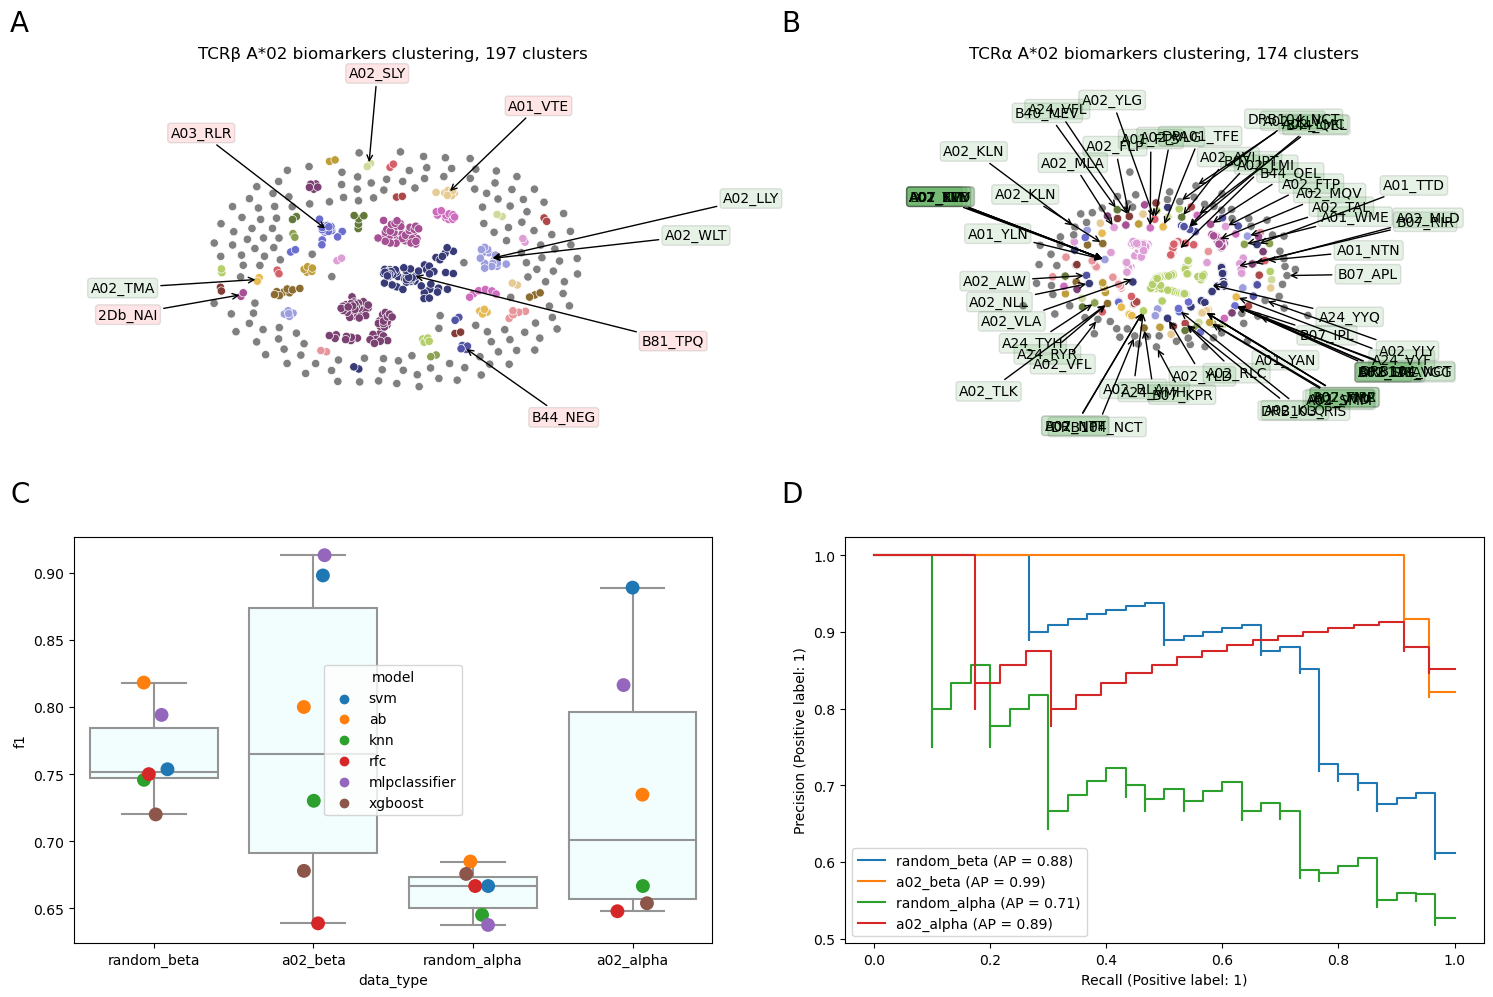

In [66]:
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(nrows=2, 
              ncols=2)
font_size=20
delta_x=-0.1
delta_y=1.14


########################################################

ax0 = fig.add_subplot(gs[0, 0])
plot_clonotype_clustering_with_epitope_labeling(res_beta, beta_cluster_to_epi, vdjdb, gene='TRB', 
                                                dist_to_center=950, global_zero_based=True, ax=ax0)
ax0.set_xlim(-1100, 1100)
ax0.set_ylim(-1100, 1100)
ax0.axis('off')
ax0.legend().remove()
ax0.set_title(f'TCRβ A*02 biomarkers clustering, {res_beta.cluster.max() + 1} clusters')
ax0.text(delta_x, delta_y, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax0.transAxes,
        size=font_size)

########################################################
ax1 = fig.add_subplot(gs[0, 1])
plot_clonotype_clustering_with_epitope_labeling(res_alpha, alpha_cluster_to_epi, vdjdb, gene='TRA', dist_to_center=600, 
                                                global_zero_based=True, species_to_plot=['SARS-CoV-2'], ax=ax1)

ax1.set_xlim(-1100, 1100)
ax1.set_ylim(-1100, 1100)
ax1.axis('off')
ax1.legend().remove()
ax1.set_title(f'TCRα A*02 biomarkers clustering, {res_alpha.cluster.max() + 1} clusters')
ax1.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)

########################################################

ax2 = fig.add_subplot(gs[1, 0])

sns.stripplot(data=comparison_df, x="data_type", y="f1", hue="model", s=10, ax=ax2)
sns.boxplot(data=comparison_df, x="data_type", y="f1", color='azure', ax=ax2)
ax2.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)

########################################################

ax3 = fig.add_subplot(gs[1, 1])
for key in all_clfs:
    PrecisionRecallDisplay.from_estimator(
        all_clfs[key][0]['svm'], X_test_data[key], y_test_data[key], name=key, ax=ax3
    )
ax3.text(delta_x, delta_y, 'D',
 horizontalalignment='left',
 verticalalignment='top',
transform=ax3.transAxes,
    size=font_size)

########################################################

plt.tight_layout()
plt.savefig("figures/fig6.svg")
plt.savefig("figures/fig6.pdf")
plt.savefig("figures/fig6.png")
plt.show()
